### Feature Selection
- Read and clean data
    - Drop NaNs
    - Drop unnamed column added when generating the csv and application id

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\milan\Documents\GitHub\DSC-630-Project\clean_df.csv')
# df = df.dropna()
# df = df.drop(columns = 'application_id')
# df.drop(df.columns[[0]],axis=1,inplace=True)
df.shape

In [2]:
df.head()

,open_to_submit_min,submit_to_approve_min,channel_combined,pre_approval_interactions,post_approval_pre_bind_interactions,sessions_uniq,event_total,session_pageload_total,url_uniq,device,...,product,quoted_risk_class,approved_risk_class,quoted_premium,premium_difference,premium_pct_diff,annual_approved_premium,face_prem_ratio,income_prem_ratio,bind
0,6,1,0.47824,0,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.454665,0.424481,0.256619,251.00,-151.67,-0.604263,4832.04,206.951929,37.665251,0
1,5,1,0.47824,0,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.381739,0.432331,0.534346,30.50,-9.33,-0.305902,477.96,1464.557704,110.155662,1
2,8,1,0.47824,0,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.454665,0.432331,0.534346,19.75,-5.42,-0.274430,302.04,1655.409879,127.744670,1
3,4,1,0.47824,1,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.370102,0.424481,0.436973,84.75,0.00,0.000000,1017.00,737.463127,54.277286,0
4,2,1,0.47824,3,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.370102,0.432331,0.436973,50.33,-32.09,-0.637592,989.04,707.757017,79.737928,0


In [2]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# #Create the function to fit and transform the label encoder
# def label_encode_columns(df, columns):
# #     encoders = {}
#     for col in columns:
#         le = LabelEncoder().fit(df[col])
#         df[col] = le.transform(df[col])
# #         encoders[col] = le
#     return df
# # , encoders
# # note that we create fitted encoders to use with the test dataset, since we need to apply the same encoder 
# # to the test data as the train data

In [43]:
# #Create the function to take in the fitted encoders and transform the test dataset
# def label_encode_columns_w_fit_encoders(df, columns, encoders):
#     for col in columns:
#         le = encoders.get(col)
#         df[col] = le.transform(df[col])
#     return df

Identify columns that need to be encoded, i.e. object

In [3]:
df.dtypes

open_to_submit_min                       int64
submit_to_approve_min                    int64
channel_combined                       float64
pre_approval_interactions                int64
post_approval_pre_bind_interactions      int64
sessions_uniq                          float64
event_total                            float64
session_pageload_total                 float64
url_uniq                               float64
device                                 float64
device_name                            float64
avg_seconds_per_session                float64
avg_events_per_session                 float64
gender                                 float64
tb                                       int64
current_ins                            float64
rx_result                              float64
employment_status                      float64
postal_code_address                    float64
income_payment_period                  float64
alcohol_weekly                         float64
disability_pm

In [3]:
# encode_columns = [ 'channel_combined', 'device', 'device_name', 'open_date',
#        'gender', 'current_ins', 'rx_result', 'employment_status', 'postal_code_address',
#        'income_payment_period', 'business_line', 'product',
#        'quoted_risk_class', 'approved_risk_class']

Split data into train and test sets

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0)

train, test = train_test_split(df, test_size = 0.2)


Label encode columns in the training set

In [5]:
# train = label_encode_columns(df = train, columns = encode_columns)

C:\Users\milan\AppData\Local\Temp/ipykernel_14012/3474278600.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])


Separate features and target for train and test sets

In [5]:
features = train.drop('bind', axis=1)
target = train['bind']
test_features = test.drop('bind', axis=1)
test_target = test['bind']

Use RFE to automatically select the set of features

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
rfecv = RFECV(estimator=tree, step=1, scoring='neg_mean_squared_error')
rfecv.fit(features, target)
rfecv.transform(features)

array([[4.00000000e+00, 1.00000000e+00, 3.55077835e-01, ...,
        5.30040000e+02, 1.88665006e+02, 4.04686439e+01],
       [2.00000000e+00, 2.00000000e+00, 5.40130152e-01, ...,
        2.57040000e+02, 1.94522253e+02, 1.86741363e+02],
       [4.00000000e+00, 1.00000000e+00, 2.71951831e-01, ...,
        4.01196000e+03, 2.49254728e+02, 1.75113909e+01],
       ...,
       [4.00000000e+00, 1.00000000e+00, 5.70469415e-01, ...,
        4.21560000e+02, 3.55821235e+02, 4.93405446e+01],
       [1.60000000e+01, 1.00000000e+00, 5.70469415e-01, ...,
        9.73560000e+02, 1.54073709e+02, 1.77029191e+02],
       [9.00000000e+00, 1.00000000e+00, 5.40130152e-01, ...,
        6.36960000e+02, 3.92489324e+02, 2.67445365e+03]])

In [8]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(tree, features, target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(mean(scores))

NameError: name 'RepeatedStratifiedKFold' is not defined

In [9]:
for i in range(features.shape[1]):
    if rfecv.support_[i] == False:
        print(features.columns[i])

tb
disability_pmts
previous_declined
med_conditions_count
business_line


RFE kept all but three features, so I will see if I can manually reduce the set further.

In [10]:
features.columns

Index(['open_to_submit_min', 'submit_to_approve_min', 'channel_combined',
       'pre_approval_interactions', 'post_approval_pre_bind_interactions',
       'sessions_uniq', 'event_total', 'session_pageload_total', 'url_uniq',
       'device', 'device_name', 'avg_seconds_per_session',
       'avg_events_per_session', 'gender', 'tb', 'current_ins', 'rx_result',
       'employment_status', 'postal_code_address', 'income_payment_period',
       'alcohol_weekly', 'disability_pmts', 'lrc_score', 'previous_declined',
       'med_conditions_count', 'bmi', 'age', 'income_comb', 'business_line',
       'face_amount', 'product', 'quoted_risk_class', 'approved_risk_class',
       'quoted_premium', 'premium_difference', 'premium_pct_diff',
       'annual_approved_premium', 'face_prem_ratio', 'income_prem_ratio'],
      dtype='object')

In [11]:
# select the top 20 features
from sklearn.feature_selection import RFE
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 20)
rfe.fit(features, target)

features_list = []
for i in range(features.shape[1]):
    if rfe.support_[i] == True:
        features_list.append(features.columns[i])
print(features_list)

['open_to_submit_min', 'submit_to_approve_min', 'channel_combined', 'post_approval_pre_bind_interactions', 'event_total', 'session_pageload_total', 'url_uniq', 'avg_seconds_per_session', 'avg_events_per_session', 'postal_code_address', 'lrc_score', 'bmi', 'age', 'income_comb', 'quoted_premium', 'premium_difference', 'premium_pct_diff', 'annual_approved_premium', 'face_prem_ratio', 'income_prem_ratio']


In [13]:
# select the top 7 features
from sklearn.feature_selection import RFE
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 6)
rfe.fit(features, target)

for i in range(features.shape[1]):
    if rfe.support_[i] == True:
        print(features.columns[i])

url_uniq
avg_seconds_per_session
postal_code_address
lrc_score
quoted_premium
face_prem_ratio


Below I tune the 'number of features' parameter by checking the accuracy of models generated using different numbers of features

>7 0.762 (0.010)
>8 0.782 (0.008)
>9 0.783 (0.006)
>10 0.784 (0.007)
>11 0.784 (0.005)
>12 0.784 (0.007)
>13 0.787 (0.008)
>14 0.788 (0.008)
>15 0.788 (0.008)
>16 0.787 (0.006)
>17 0.788 (0.008)
>18 0.786 (0.006)
>19 0.787 (0.006)


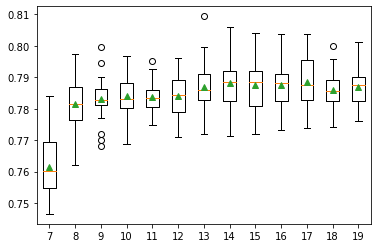

In [14]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


# get a list of models to evaluate
# NOTE: I tried using 1 to 10 features, and the accuracy increased with each additional feature
# now I look at using from 10 to 20 features
def get_models():
    models = dict()
    for i in range(7, 20):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, features, target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()